# Probability Plot

- If you want to confirm that your population is based on some distribution, you can compare your sample data and percentiles of the distribution corresponding to sample percentiles by plotting two sets of data. 
- If there is a linear behavior between the two sets, you can say that your sample data comes from the assumed distribution. In other words, your population is based on the assumed distribution. 

1. Sort your sample in the asencding order. 
2. Calculate sample percentiles by using $(i-0.5)/n$. 
3. Calculate percentiles of the assumed distribution corresponding to the sample percentiles
4. Compare your sample data and the computed percentiles of the assumed distribution. 

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## STEP 01. Prepare sample data. 

In [1]:
sample_data = [27.54, 24.46, 28.04, 26.25, 26.42, 26.66, 28.49, 27.31, 27.74, 27.94,\
               27.98, 25.61, 28.28, 28.50, 28.87, 29.11, 27.15, 29.13, 29.50, 30.88]

## STEP 02. Sort your sample data in the ascending order

- https://numpy.org/doc/stable/reference/generated/numpy.sort.html

In [4]:
sample_sorted = np.sort(sample_data)

In [5]:
print(sample_sorted)

[24.46 25.61 26.25 26.42 26.66 27.15 27.31 27.54 27.74 27.94 27.98 28.04
 28.28 28.49 28.5  28.87 29.11 29.13 29.5  30.88]


## STEP 03. Calculate indices corresponding to the sorted sample data

In [7]:
n = len(sample_sorted)
print(n)

20


In [8]:
idx = np.arange(1, 1+len(sample_sorted), 1)
print(idx)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## STEP 04. Calculate sample percentages corresponding to the indices of the sorted sample. 

- sample percentage = $(i-0.5)/n$, where $n$ is the number of sample data. 

In [9]:
sample_percent = (idx-0.5)/n

In [10]:
print(sample_percent)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


## STEP 05. Assume one possible distribution of population

In [11]:
from scipy.stats import norm

In [12]:
z = norm(loc=0, scale=1.0)

## STEP 06. Calculate percentiles of the assumed distribution corresponding to the sample percentages

In [13]:
percentiles = z.ppf(sample_percent)

In [14]:
percentiles

array([-1.95996398, -1.43953147, -1.15034938, -0.93458929, -0.75541503,
       -0.59776013, -0.45376219, -0.31863936, -0.18911843, -0.06270678,
        0.06270678,  0.18911843,  0.31863936,  0.45376219,  0.59776013,
        0.75541503,  0.93458929,  1.15034938,  1.43953147,  1.95996398])

## STEP 07. Compare sorted sample data and percentiles calculated above

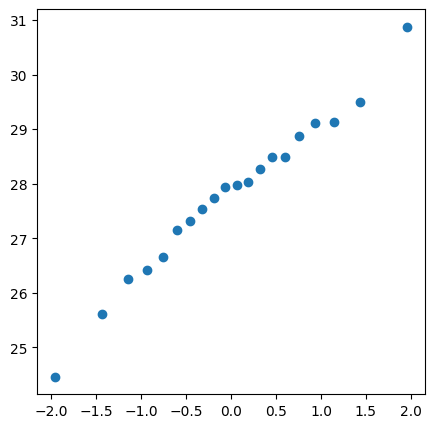

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, marker="o", lw=0)
plt.show()

- We have observed that there is a linear relation between sample data and calculated percentiles of the assumed distribution, which is normal here. 
- It means that these sample data possibly come from the assumed distribution. 
- Here we might say that the population is (approximately) normal. 

- Q : How can we find out whether the graph is linear or not?
- There is a technique called as linear regression or linear curve-fitting to show that given data exhibits a linear behavior. 

# Curve_fit from Scipy

In [17]:
from scipy.optimize import curve_fit

In [18]:
def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, percentiles, sample_sorted)

In [20]:
popt

array([ 1.45525106, 27.793     ])

- fitted linear line: $y = 1.455x + 27.793$

In [21]:
y_fitted = func(percentiles, popt[0], popt[1])

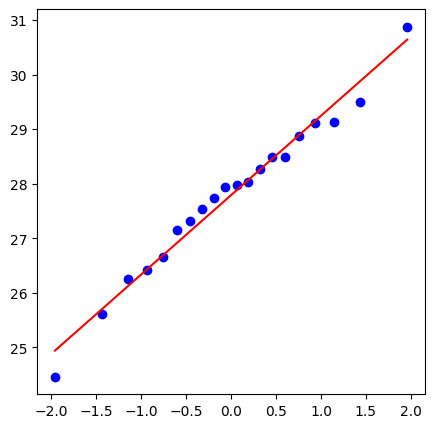

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, color="blue", marker="o", lw=0) # actual data
ax.plot(percentiles, y_fitted, color="red") # fitted linear line
plt.show()